# Accelerated Cure - Consolidated Data Visualization

<div class="alert alert-info">By: Data Science, Fall 2022, Academy at Penguin Hall</div>

---

## Data Preparation

**Imports**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

parts = pd.read_pickle('pkl/parts.pkl')
parts

,disease,diag_dis,dom_hand,sex,wt_kg,ht_cm,eth_part,rac_part,moth_smk
BARCODE2,,,,,,,,,
AC000003,MS,CASE,LEFT,MALE,90.718474,180.34,Non Hispanic or Latino,White,False
AC000005,MS,CASE,RIGHT,FEMALE,93.440028,167.64,Non Hispanic or Latino,White,False
AC000006,CONTROL,CONTROL,RIGHT,FEMALE,102.058283,162.56,Non Hispanic or Latino,White,True
AC000007,CONTROL,CONTROL,LEFT,MALE,79.832257,179.07,Non Hispanic or Latino,White,False
AC000009,TM,CASE,RIGHT,FEMALE,58.967008,166.37,Non Hispanic or Latino,White,True
...,...,...,...,...,...,...,...,...,...
PC001059,CONTROL,CONTROL,RIGHT,MALE,27.215542,132.08,Non Hispanic or Latino,White,False
PC001064,CONTROL,CONTROL,RIGHT,FEMALE,58.967008,162.56,Non Hispanic or Latino,White,False
PC001065,CONTROL,CONTROL,RIGHT,FEMALE,48.987976,165.10,Non Hispanic or Latino,White,False


**Create body-mass index (BMI) column**

In [2]:
# faster than a list comprehension:
parts['bmi'] = parts.wt_kg / (parts.ht_cm/100) ** 2

**Check for outliers and remove bad data**

In [3]:
parts.bmi.dropna().sort_values()

BARCODE2
AC003559     12.586677
AC002428     12.873588
AC001404     13.312745
AC001185     14.643816
AC003382     14.767214
               ...    
AC003480     55.454734
AC002686     56.684874
AC001432     59.565617
AC000802     65.844185
AC003531    195.308624
Name: bmi, Length: 2977, dtype: float64

In [4]:
outlier = parts.bmi.idxmax()
parts.drop(outlier, inplace = True)

## Distribution of Body-mass Index (BMI)

<div class="alert alert-warning">Is there a difference in the distribution of BMI between case and control patients?</div>

<AxesSubplot:xlabel='bmi', ylabel='Density'>

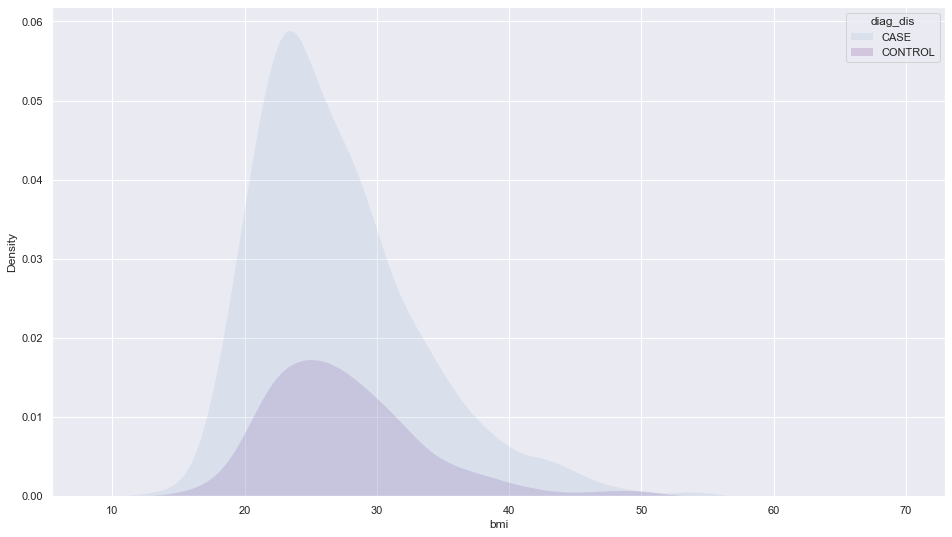

In [5]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.kdeplot(data=parts, x='bmi', hue='diag_dis', shade=True, linewidth=0, palette='BuPu')

<div class="alert alert-info">It appears there may be a higher BMI among control patients.</div>

<div class="alert alert-warning">What about when we consider the patients' sex?</div>

<AxesSubplot:xlabel='diag_dis', ylabel='bmi'>

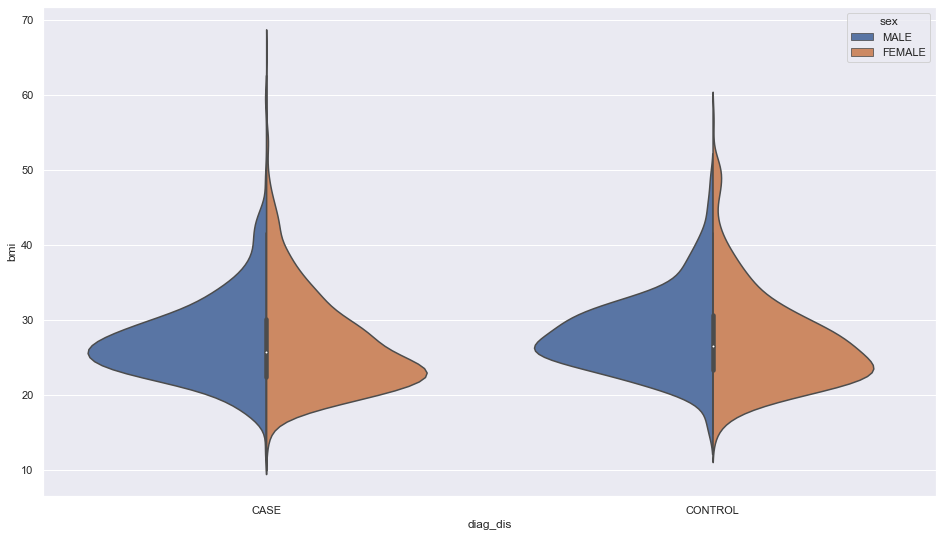

In [6]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.violinplot(data=parts, x='diag_dis', y='bmi', hue='sex', split=True)

<AxesSubplot:xlabel='diag_dis', ylabel='bmi'>

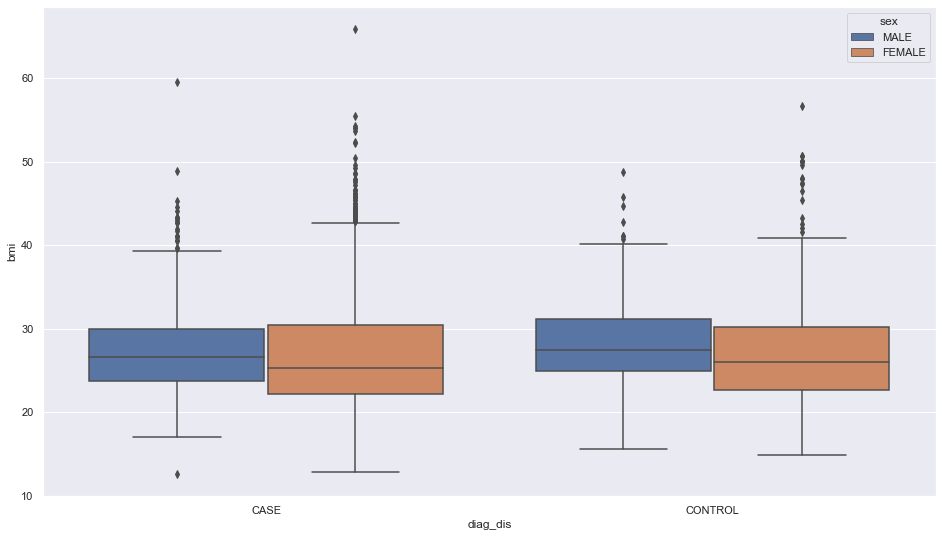

In [7]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.boxplot(data=parts, x='diag_dis', y='bmi', hue='sex')

<div class="alert alert-info">As shown above, mean BMI is slightly lower among female patients, with little difference between case and control.</div>

<div class="alert alert-warning">And what about when we consider whether the mother smoked?</div>

<AxesSubplot:xlabel='diag_dis', ylabel='bmi'>

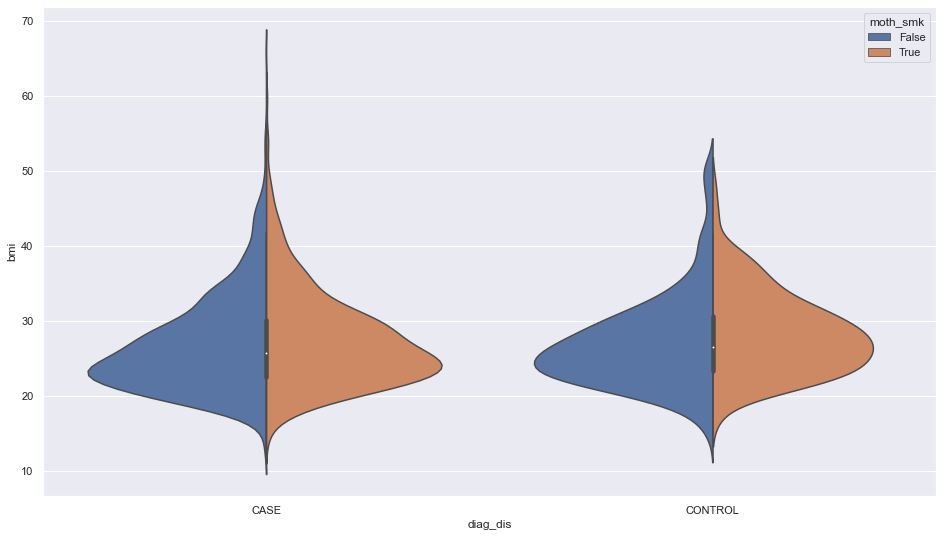

In [8]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.violinplot(data=parts, x='diag_dis', y='bmi', hue='moth_smk', split=True)

<div class="alert alert-info">We still see that control patients have slightly higher BMI, but there is a wider distribution of BMI among women whose mothers smoked than women whose mothers did not smoke.</div>

---

## Ratio of "mother smoked" in case vs. control patients

<div class="alert alert-warning">Are there differences between case and control populations when it comes to "mother smoked"?</div>


In [9]:
moth_smk_by_diag = parts.moth_smk.groupby(parts['diag_dis']).value_counts()
moth_smk_by_diag

diag_dis  moth_smk
CASE      False       1474
          True         541
CONTROL   False        433
          True         172
Name: moth_smk, dtype: int64

<AxesSubplot:xlabel='diag_dis'>

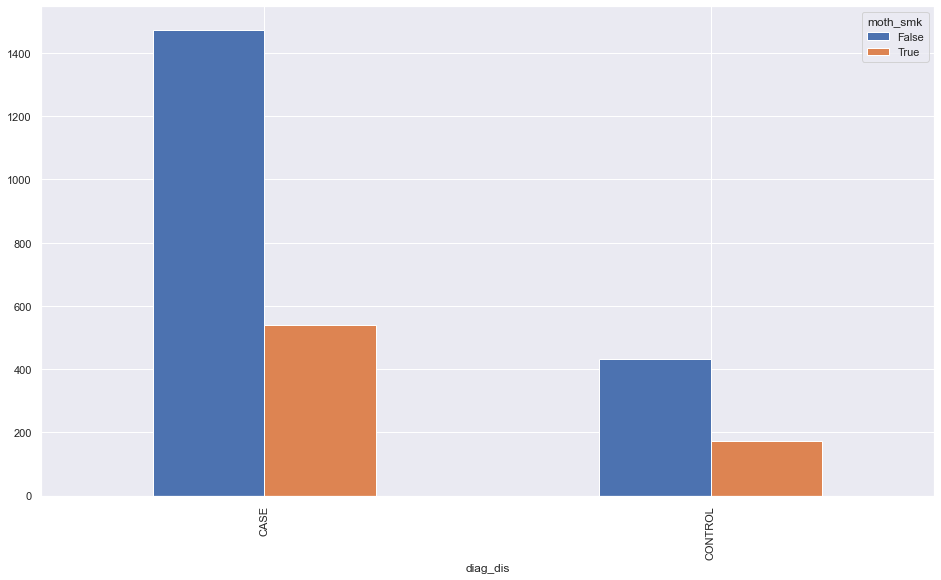

In [10]:
moth_smk_by_diag.unstack().plot(kind='bar')

In [11]:
case = parts.loc[parts.diag_dis == "CASE"]
casegroup = case.groupby("moth_smk").moth_smk.count()
casegroup

moth_smk
False    1474
True      541
Name: moth_smk, dtype: int64

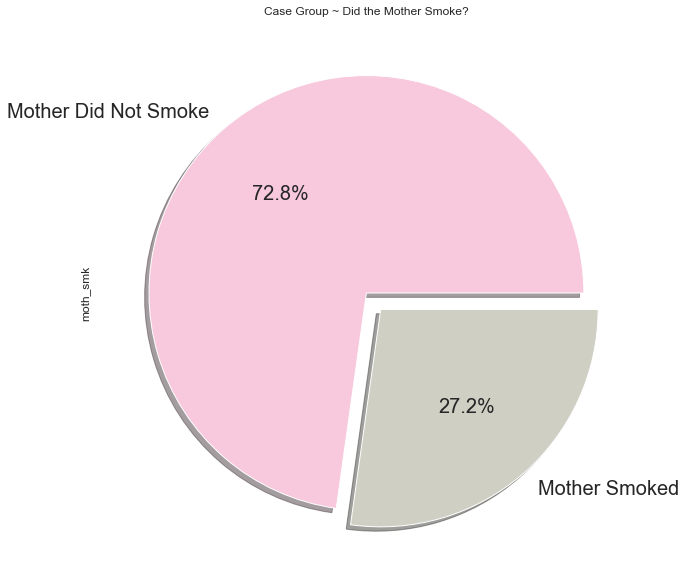

In [12]:
casegroup = parts.groupby("moth_smk").moth_smk.count()

labels = ['Mother Did Not Smoke', 'Mother Smoked']
explode = (0, 0.1)
colors = ['#F8C8DC','#cfcfc4']
caseplot = casegroup.plot.pie(title = "Case Group ~ Did the Mother Smoke?", y='casegroup', figsize=(10, 10),autopct='%1.1f%%', labels = labels, explode = explode, shadow = True, colors = colors, fontsize=20)

In [13]:
control = parts.loc[parts.diag_dis == "CONTROL"]
controlgroup = control.groupby("moth_smk").moth_smk.count()
controlgroup

moth_smk
False    433
True     172
Name: moth_smk, dtype: int64

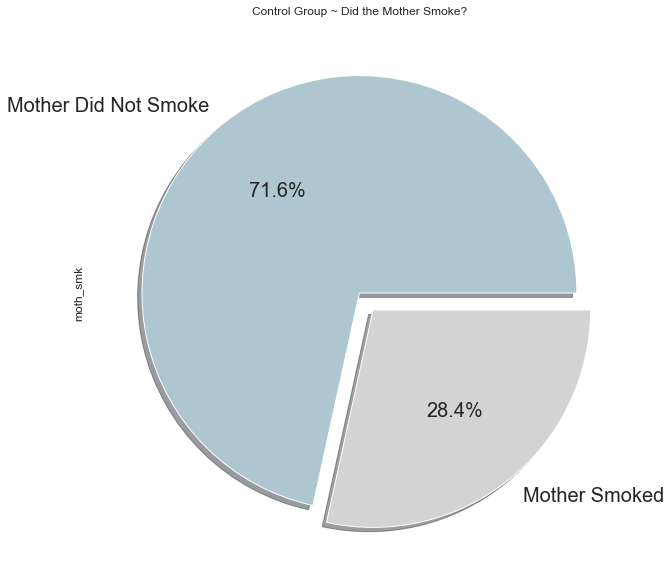

In [14]:
labels = ['Mother Did Not Smoke', 'Mother Smoked']
explode = (0, 0.1)
colors = colors = ['#AEC6CF','#D3D3D3']

controlplot = controlgroup.plot.pie(title = "Control Group ~ Did the Mother Smoke?", y='controlgroup', figsize=(10, 10),autopct='%1.1f%%',labels = labels, explode = explode, shadow = True, colors = colors,fontsize=20)


<div class="alert alert-info">The above pie charts show little difference between case and control populations when it comes to whether the mother smoked or not.</div>

---

## Ratio of case vs. control for each race

<div class="alert alert-warning">Is our data equally divided between case and control across each race?</div>

In [15]:
races = list(pd.unique(parts['rac_part']))
races.pop(-1)
races

['White',
 'Black or African American',
 'Other Asian',
 'Middle Eastern',
 'Native Hawaiian or other Pacific Islander',
 'South Asian',
 'Unknown',
 'American Indian or Alaska native']

In [16]:
%%javascript
// disable scrolling in the next cell

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

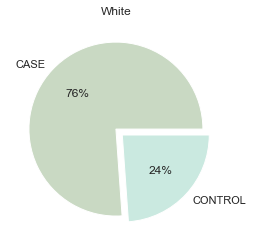

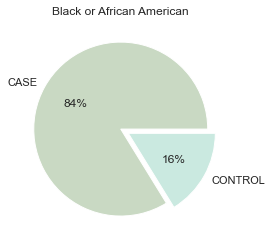

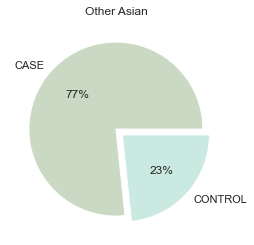

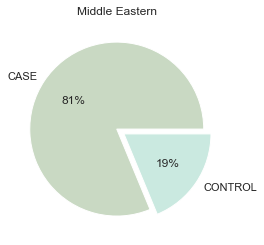

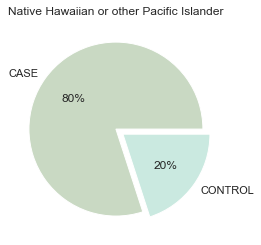

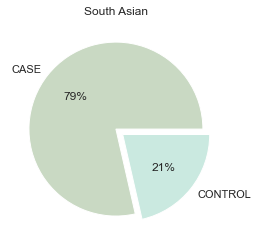

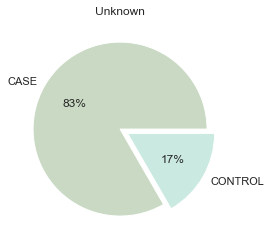

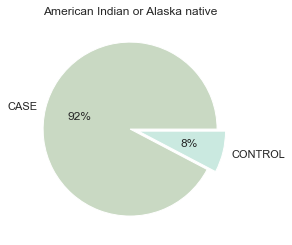

In [17]:
for r in races:
    v = parts.loc[parts['rac_part'] == r, ['rac_part', 'diag_dis']].groupby('diag_dis').diag_dis.count()
    plt.figure(figsize=(5, 4))
    plt.title(r)
    explode = [0, 0.1]
    plt.pie(v, labels=v.index, autopct='%1.0f%%', colors=['#C9D9C3', '#CAE9E0'], explode=explode)
    plt.show()

<div class="alert alert-info">There are significant differences in control vs. case ratio in the data for each race.</div>